# Plotting Sample Data with the VAFT Plot Module

This document provides an overview of the plotting module currently under development within the VAFT library. The module aims to intuitively visualize all available OMAS-formatted experimental and modeled data mapped thus far, supporting a wide range of plotting functionalities through simple and consistent conventions.

Please note that many features are still under active development and may not yet be fully functional or stable.

At this stage, the module primarily serves as a demonstration of how existing VEST datasets can be visualized. For a broader range of examples and functionalities, please refer to the documentation and examples provided by the OMAS data access library, available at the following link:

https://gafusion.github.io/omas/auto_examples/index.html

### Load library and sample data

In [1]:
from omas import *
import numpy as np
import matplotlib.pyplot as plt
import vaft

In [2]:
# Load the OMAS data from VEST sample data case
ods = vaft.omas.sample_ods() # 1 shot data
odc = vaft.omas.sample_odc() # multiple shot datas
# OR you can use sample data from omas libray ods = ods.sample()

### change_time_convention

The change_time_convention function converts the time reference point (zero-point) of an OMAS ODS or ODC dataset to a user-specified convention. This is especially useful for aligning and comparing multiple datasets in plasma experiments, where different diagnostics may define $t=0$ differently.

`change_time_convention(odc_or_ods, convention)`

`daq` (Default)

•	Definition: Time as recorded by the data acquisition system.

•	Zero Point: No shift applied; corresponds to the hardware trigger time.

•	Use Case: Raw data analysis or when aligning across multiple diagnostics using DAQ timestamps.

`breakdown` (Most Useful)

•	Definition: Plasma initiation point determined by $H_\alpha$ emission (hydrogen line).

•	Zero Point: The time when a significant increase in H-alpha intensity is detected.

•	Use Case: Most commonly used convention in experimental plasma analysis. Useful for aligning plasma discharge phases.

`vloop`

•	Definition: Based on the flux loop voltage signal.

•	Zero Point: The first time the flux loop voltage becomes non-negative ($V_\text{loop} \ge 0$).

•	Use Case: Useful for analyzing start-up scenarios and understanding magnetic flux evolution.

`ip`

•	Definition: Based on plasma current ramp-up.

•	Zero Point: The time when plasma current $I_p$ begins to increase from zero.

•	Use Case: Useful for correlating current-driven effects or analyzing current evolution.


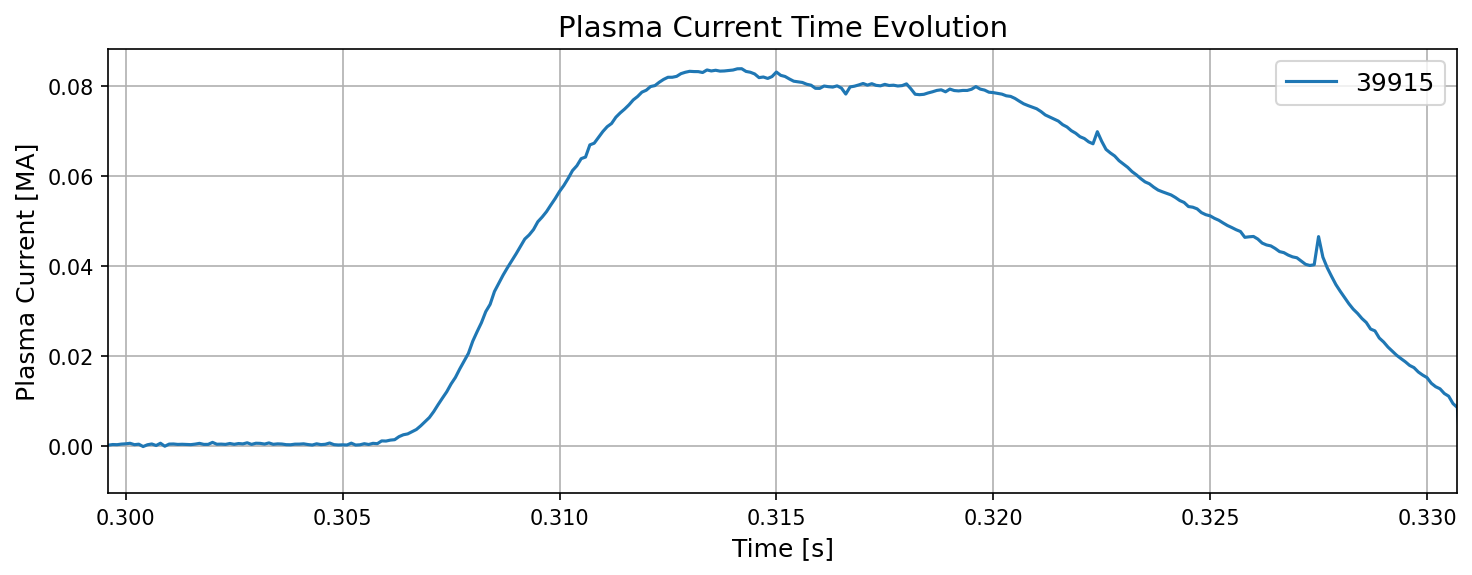

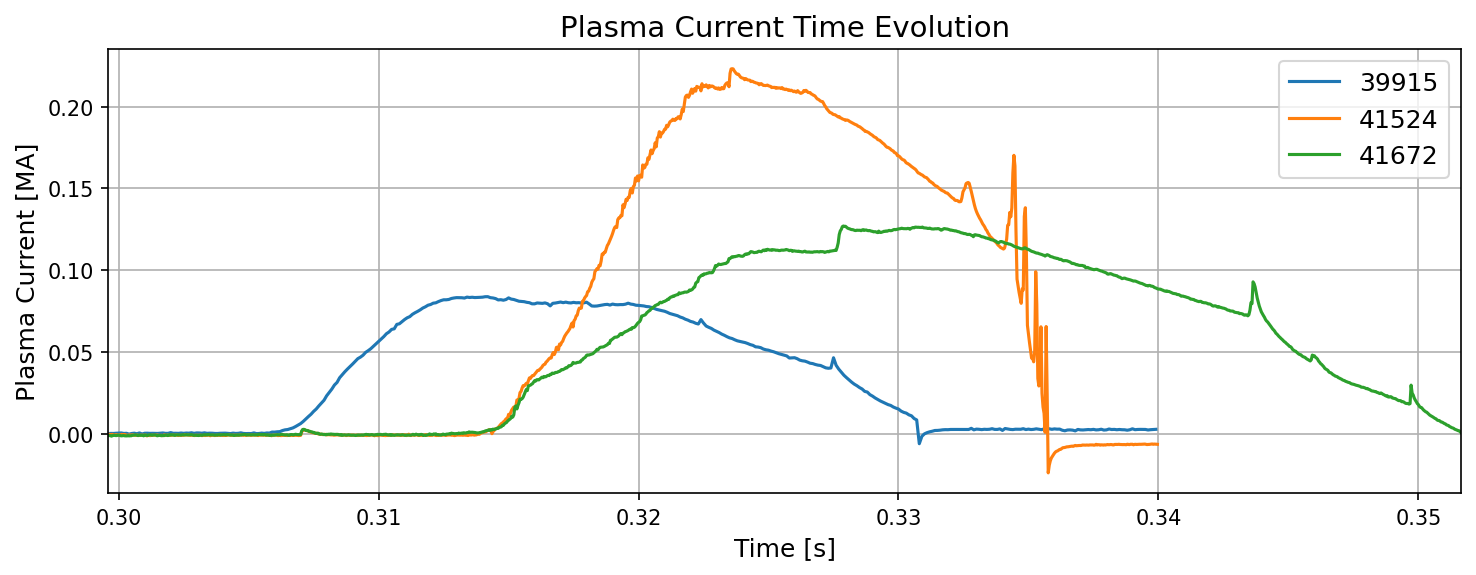

[0] shift -0.3069 s  (daq → breakdown)
[0] shift -0.3069 s  (daq → breakdown)
[1] shift -0.31484 s  (daq → breakdown)
[2] shift -0.31476 s  (daq → breakdown)


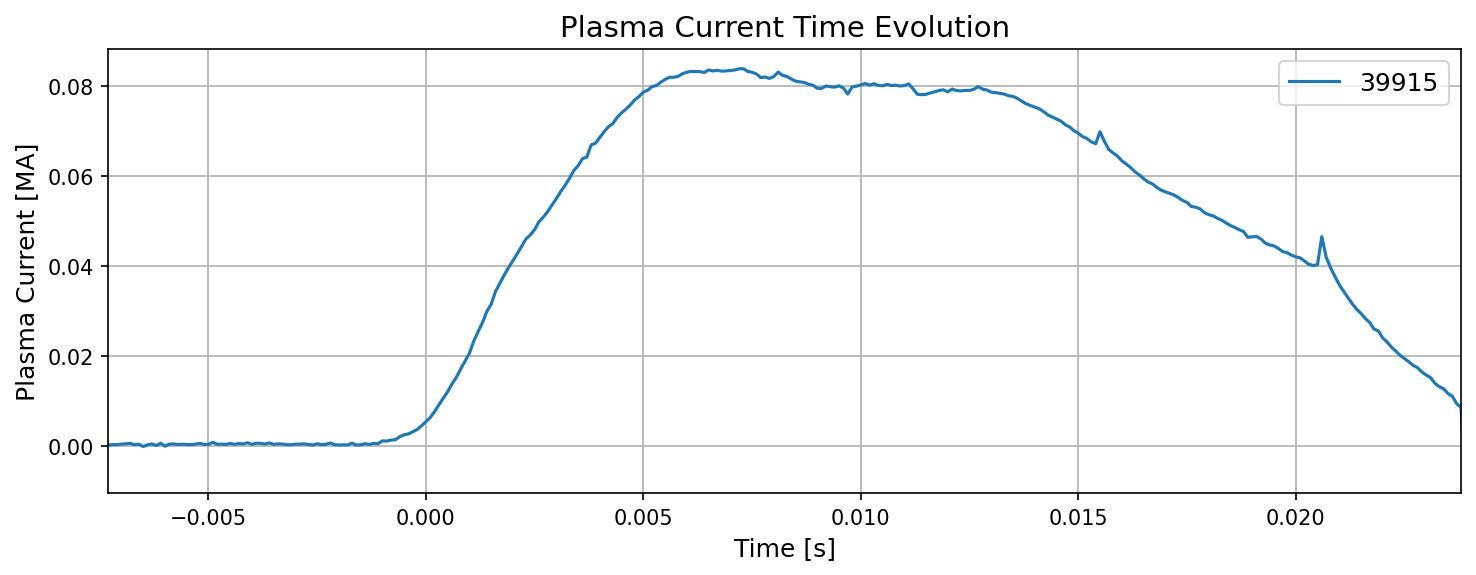

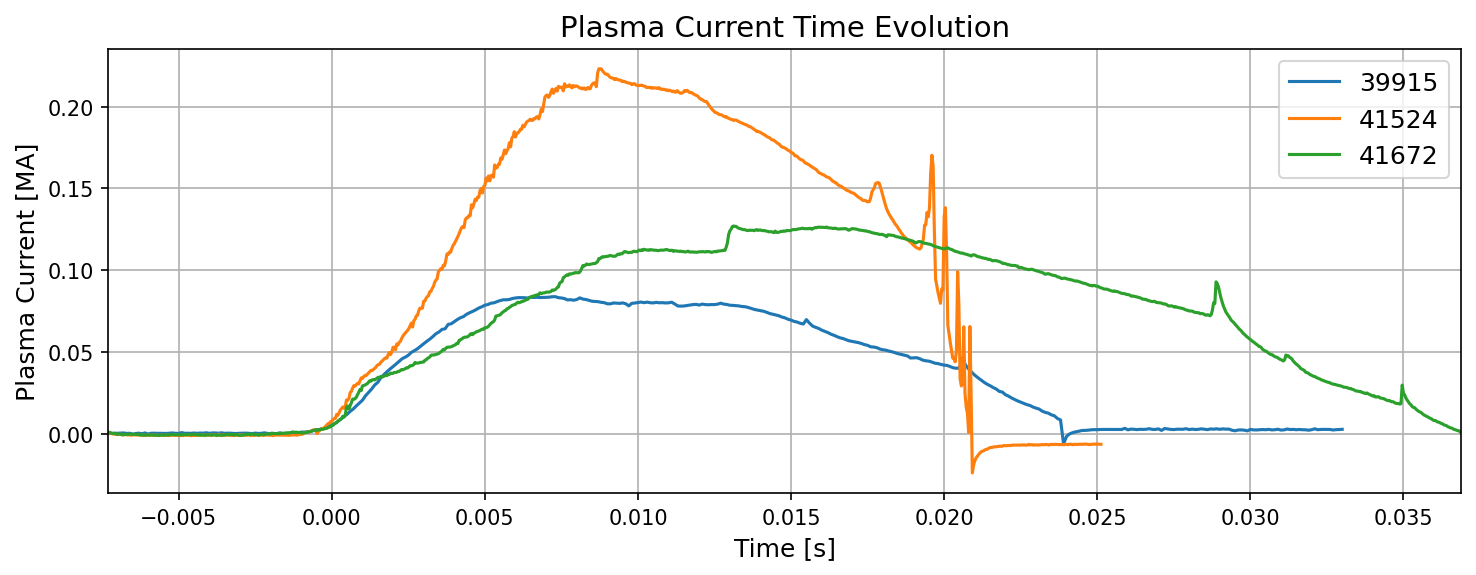

In [3]:
# You can change t=0 criteria
vaft.plot.magnetics_time_ip(ods)
vaft.plot.magnetics_time_ip(odc)
vaft.omas.change_time_convention(ods, convention = 'breakdown')
vaft.omas.change_time_convention(odc, convention = 'breakdown')
vaft.plot.magnetics_time_ip(ods)
vaft.plot.magnetics_time_ip(odc)

## General

```
vest.plot.{ods_name}_{coordinate}_{quantity}(odc_or_ods_or_list_of_ods, time_slices)
```

This function generates a plot of the specified physical quantity from a given data source (odc, a single ods, or a list of ods objects), along the specified coordinate. Optional time_slices can be used to select particular time points for plotting.

### Plotting Behavior and Usage

You can plot a single ODS file by passing an `ods` object directly to the function.

To compare multiple shots or simulations, you can also pass:
- an `odc` (ODS collection), or
- a list of ODS objects: `[ods1, ods2, ..., odsn]`

When plotting profile data such as `equilibrium` or `core_profile`, the data typically contains multiple time slices. By specifying `time_slices`, you can visualize the evolution or structure of the profile over time.

All plotting functions are designed to work seamlessly within a Jupyter Notebook or standard Python environment. 

The function automatically detects the appropriate coordinate system for the selected quantity, reducing the need for manual specification in most use cases.

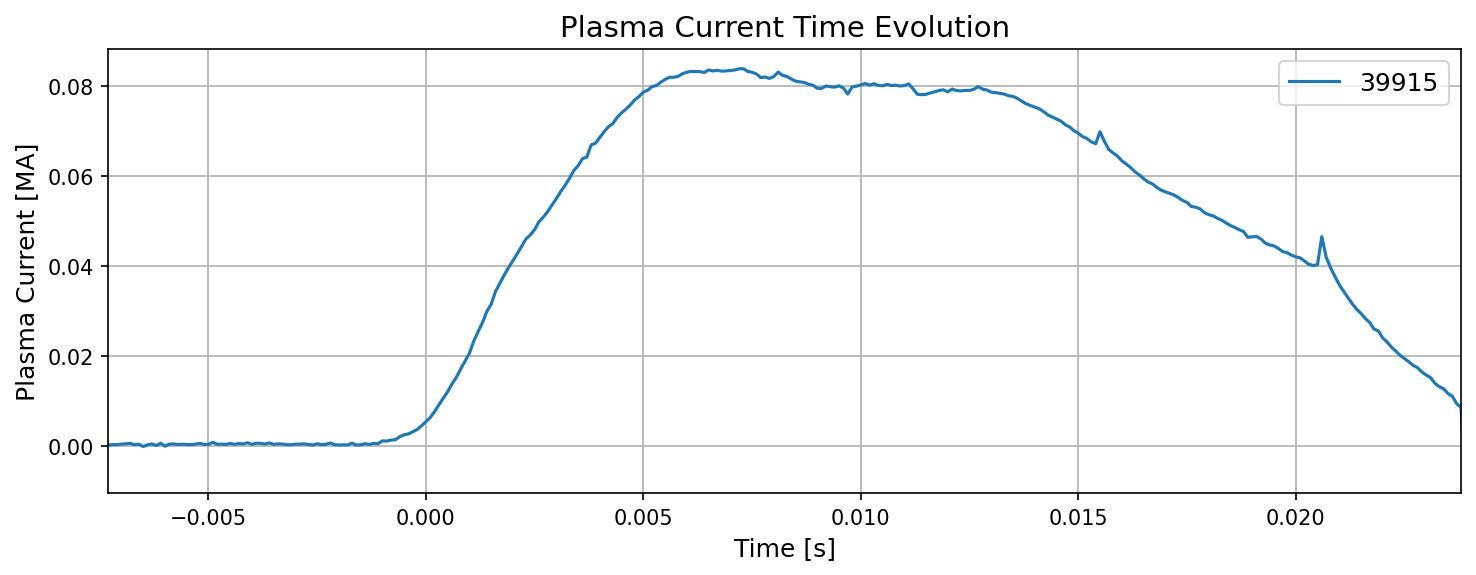

In [4]:
vaft.plot.magnetics_time_ip(ods)

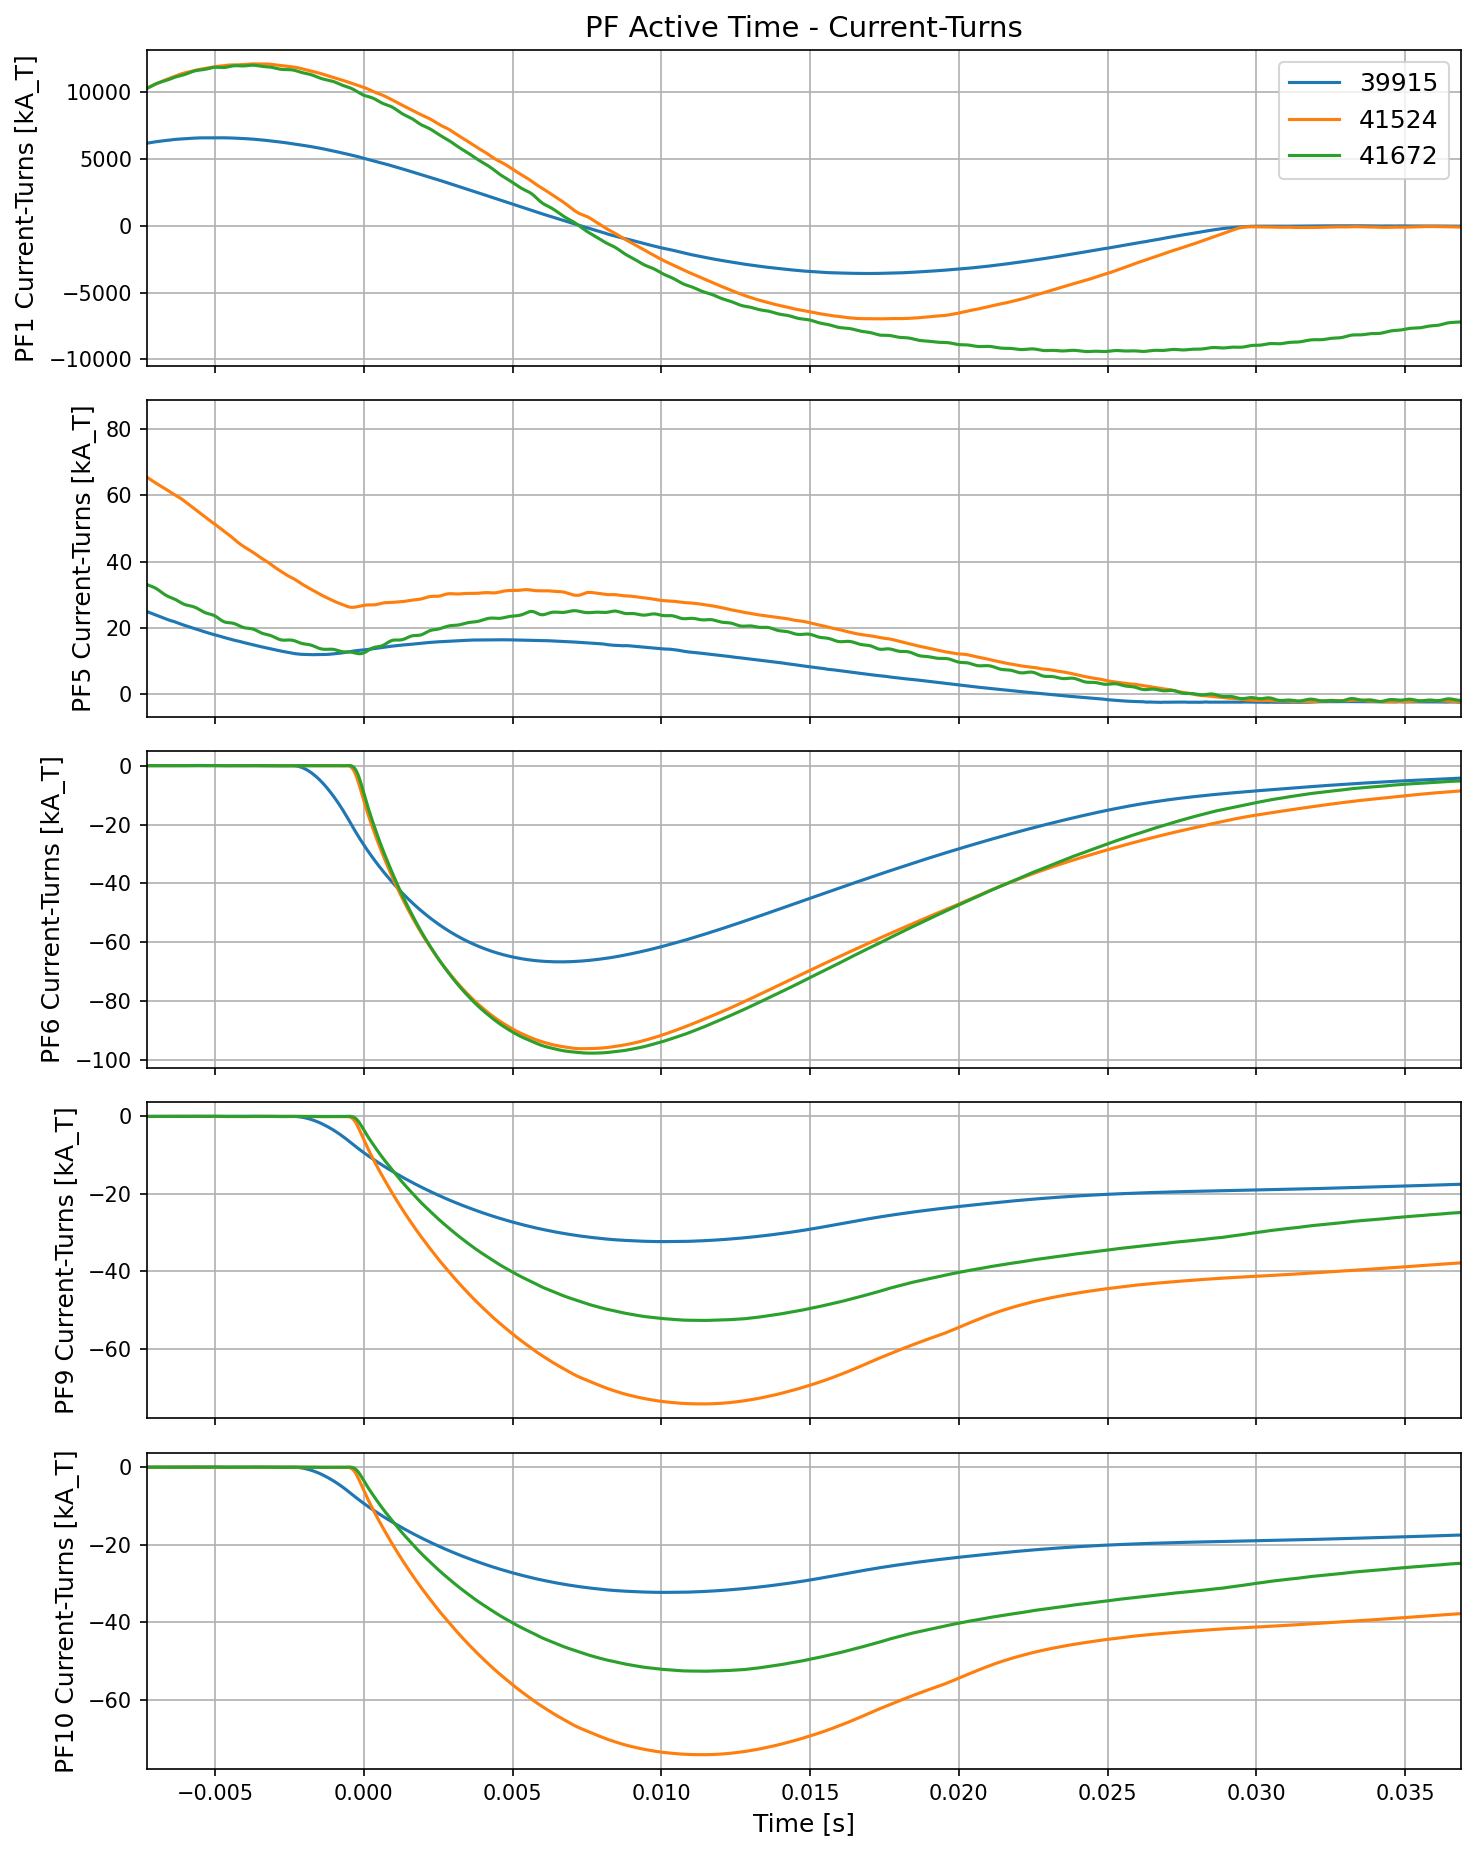

In [5]:
vaft.plot.pf_active_time_current_turns(odc)

## Coordinate

This section describes the coordinate systems used in OMAS datasets for plasma experiments, especially in relation to time evolution, 1D flux surfaces, and 2D spatial positioning. Understanding these coordinates is essential for analyzing and visualizing equilibrium, diagnostic, and kinetic data in tokamak devices.

### Time Coordinate

​    •   `time`: Temporal axis used to visualize time evolution.


### 1D Spatial Coordinates (applicable only to equilibrium data)

​    •   `psi_n`: Normalized poloidal flux, (\psi_N).

​    •   `rho_tor_norm`: Normalized toroidal flux, typically ($\rho_N = \sqrt{\psi_N}$).

​    •   `r_major`: Major radius, the distance from the machine center axis.

​    •   `r_minor`: Averaged minor radius across flux surfaces.

​    •   `r_minor_inboard`: Minor radius measured toward the inboard side (high-field side).

​    •   `r_minor_outboard`: Minor radius measured toward the outboard side (low-field side).

### 2D Spatial Coordinates (applicable for diagnostics position and equilibrium data)

​    •   `rz`: Cylindrical poloidal cross-section defined by ((R, Z)).

​    •   `psi_theta`: Straight-field-line coordinate defined by ($\psi_N, \theta$).

​    •   `top`: Top-down view projection, typically for equilibrium and toroidal assembly of diagnostics.

### Optional Parameters

Some plotting functions accept additional keyword arguments to customize the output:

- `indices`:  
  Selects a subset of elements (e.g., coils, channels, detectors) to plot.  
  This is useful when the quantity contains multiple components, such as PF coil currents or diagnostic channels.  
  Accepts a list of integers or a single integer.

- `labels`:
Provide custom labels for each index (e.g., coil names).
Shoud be matched with length of `indices`

- `yunit`:
Specifies the unit of the vertical (Y-axis) quantity to be displayed.
e.q. Plasma Current:
	•	'A' (Amperes)
	•	'kA' (kiloamperes)
	•	'MA' (megaamperes)
The unit string must match a known conversion internally handled by the plotting function.

Invalid label: ['PF 5', 'PF 9-10'], using key as label.


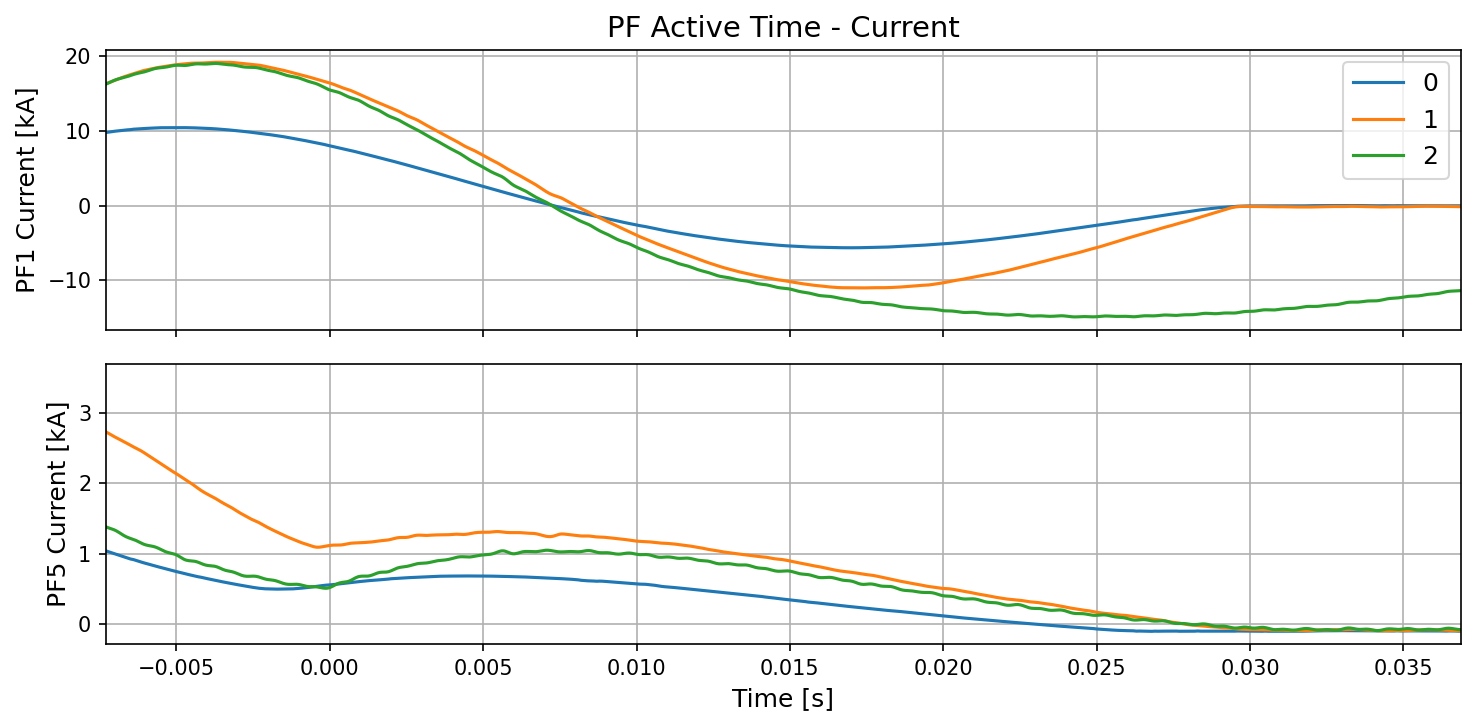

In [6]:
vaft.plot.pf_active_time_current(odc , indices = [0,4], yunit = 'kA', label=['PF 5', 'PF 9-10'])

### Plotting Temporal Signals

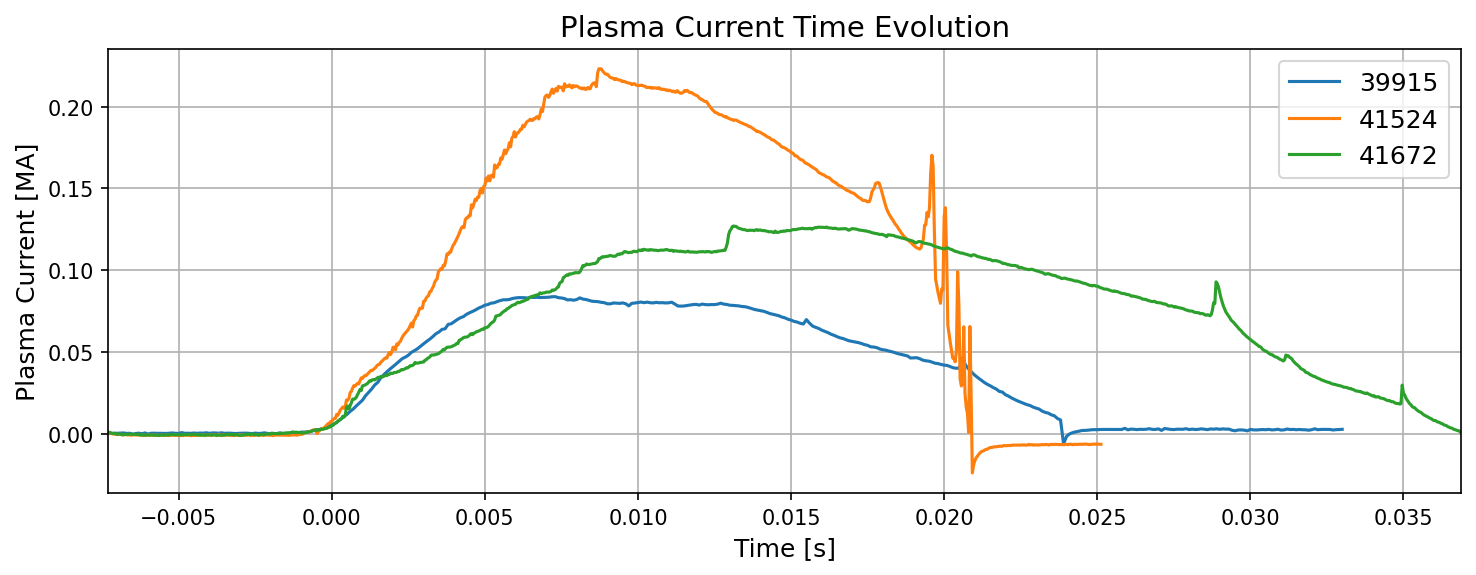

In [7]:
vaft.plot.magnetics_time_ip(odc)

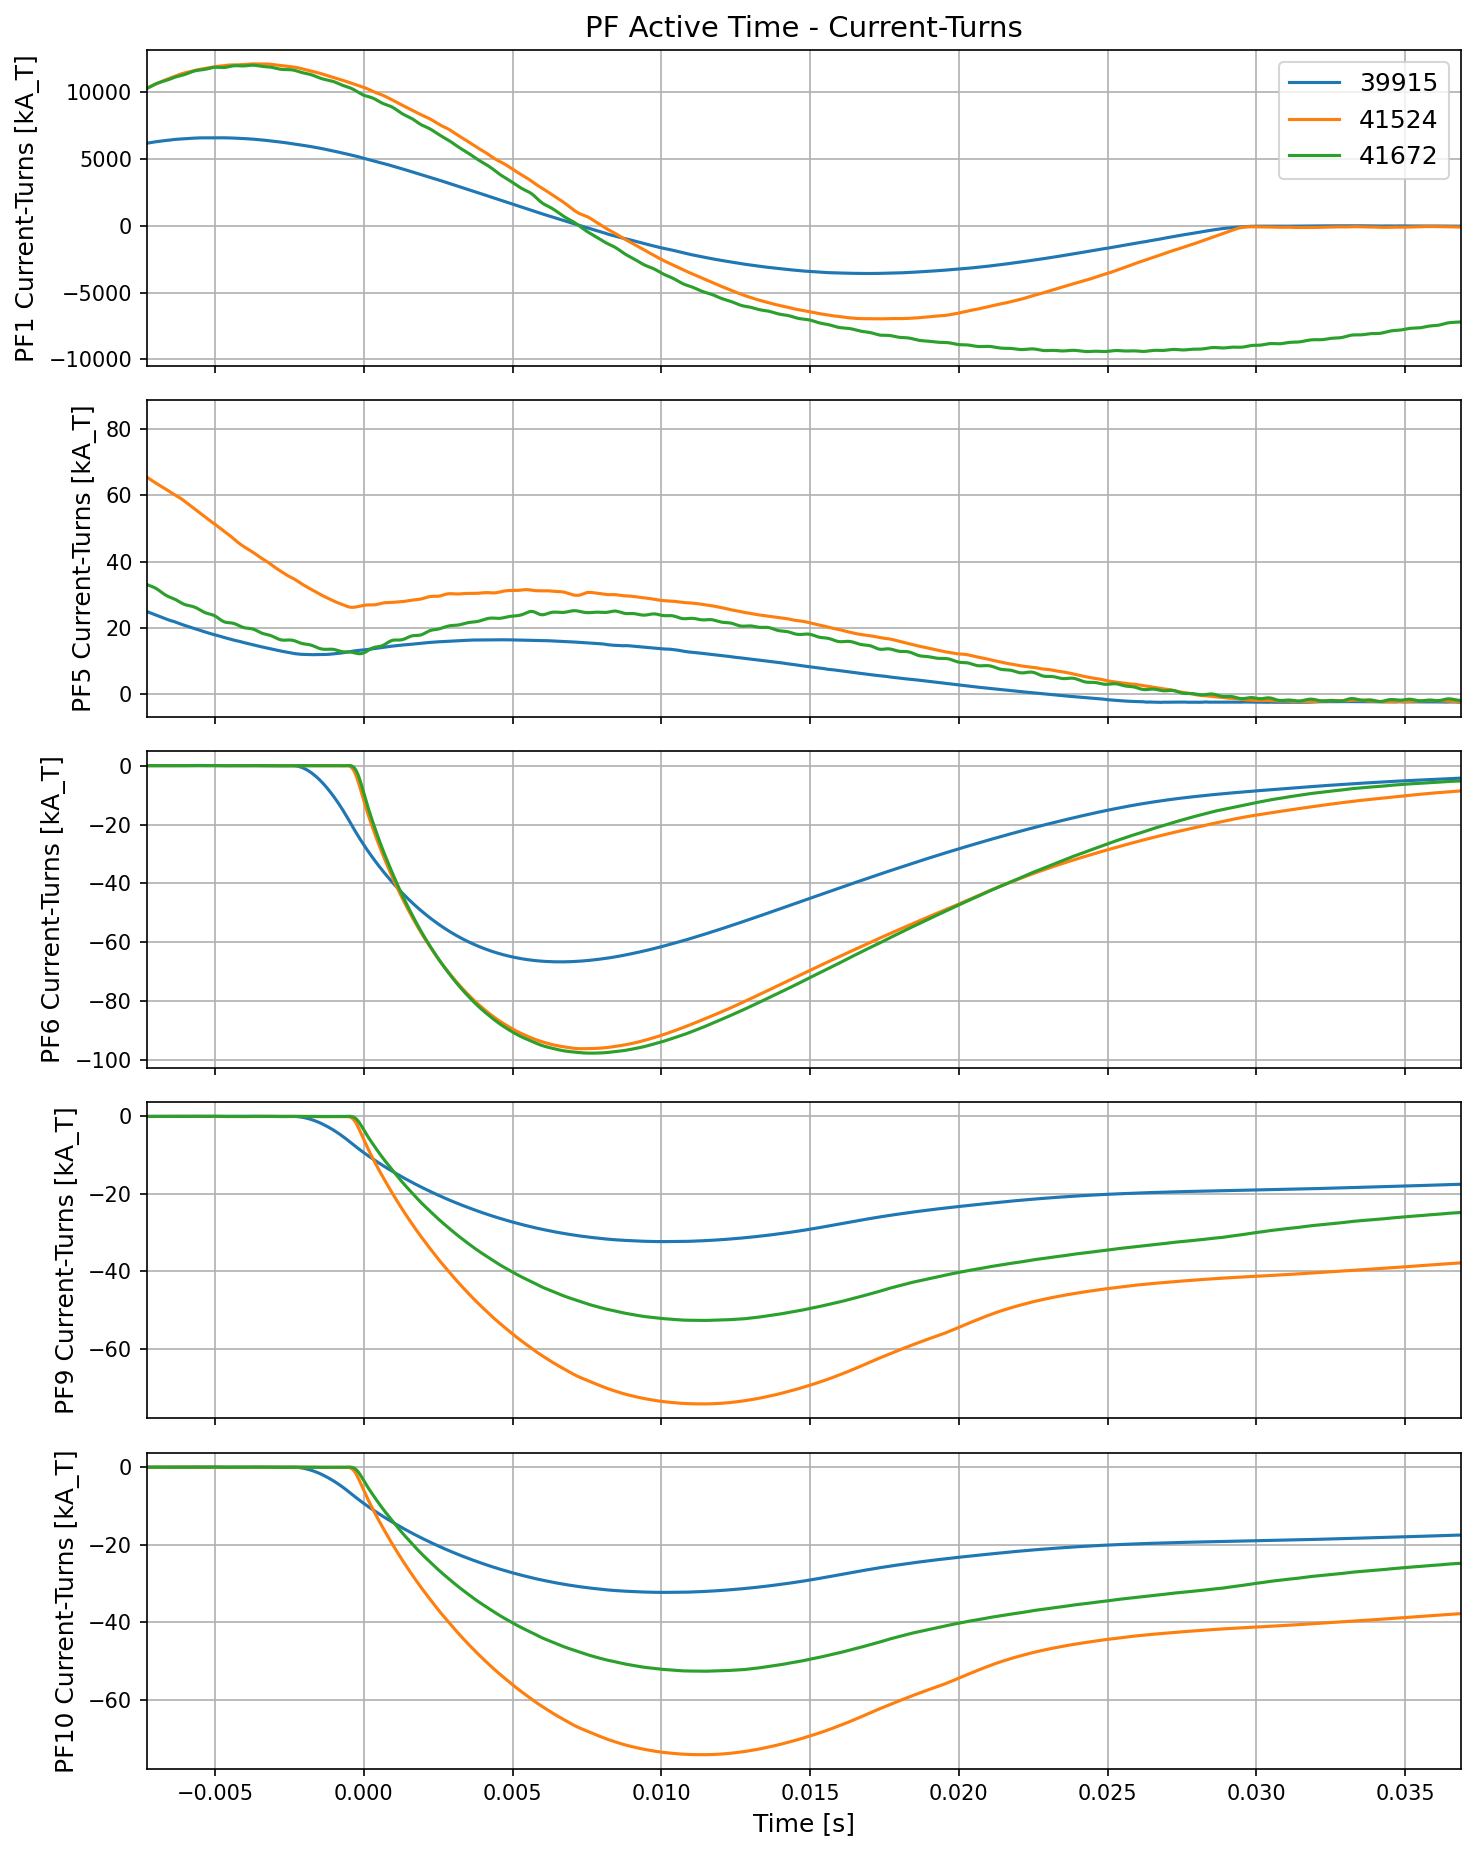

In [12]:
# vest.plot.pf_active_time_current(odc)
vaft.plot.pf_active_time_current_turns(odc)

# vest.plot.pf_active_time_current(odc , indices = [0,4], yunit = 'kA')

### Plotting 1D Profiles

In [9]:
vaft.omas.update_equilibrium_profiles_1d_normalized_psi(ods)
vaft.plot.equilibrium_rho_tor_norm_pressure(ods)

interactive(children=(Dropdown(description='Time Slice:', options=(('Idx: 0 | t=0.0091s | Ip=0.08MA', '0'), ('…

In [10]:
vaft.plot.equilibrium_rho_tor_norm_q(ods)

interactive(children=(Dropdown(description='Time Slice:', options=(('Idx: 0 | t=0.0091s | Ip=0.08MA', '0'), ('…

ax.lines before: 0
number of ODC items: 3
plotting: ods_key=0, id(ods_item)=140594570226048, max_ip_ts_key=0
ax.lines before: 0
ax.lines after: 1
plotting: ods_key=1, id(ods_item)=140597536328048, max_ip_ts_key=0
ax.lines before: 1
ax.lines after: 2
plotting: ods_key=2, id(ods_item)=140594240251184, max_ip_ts_key=0
ax.lines before: 2
ax.lines after: 3


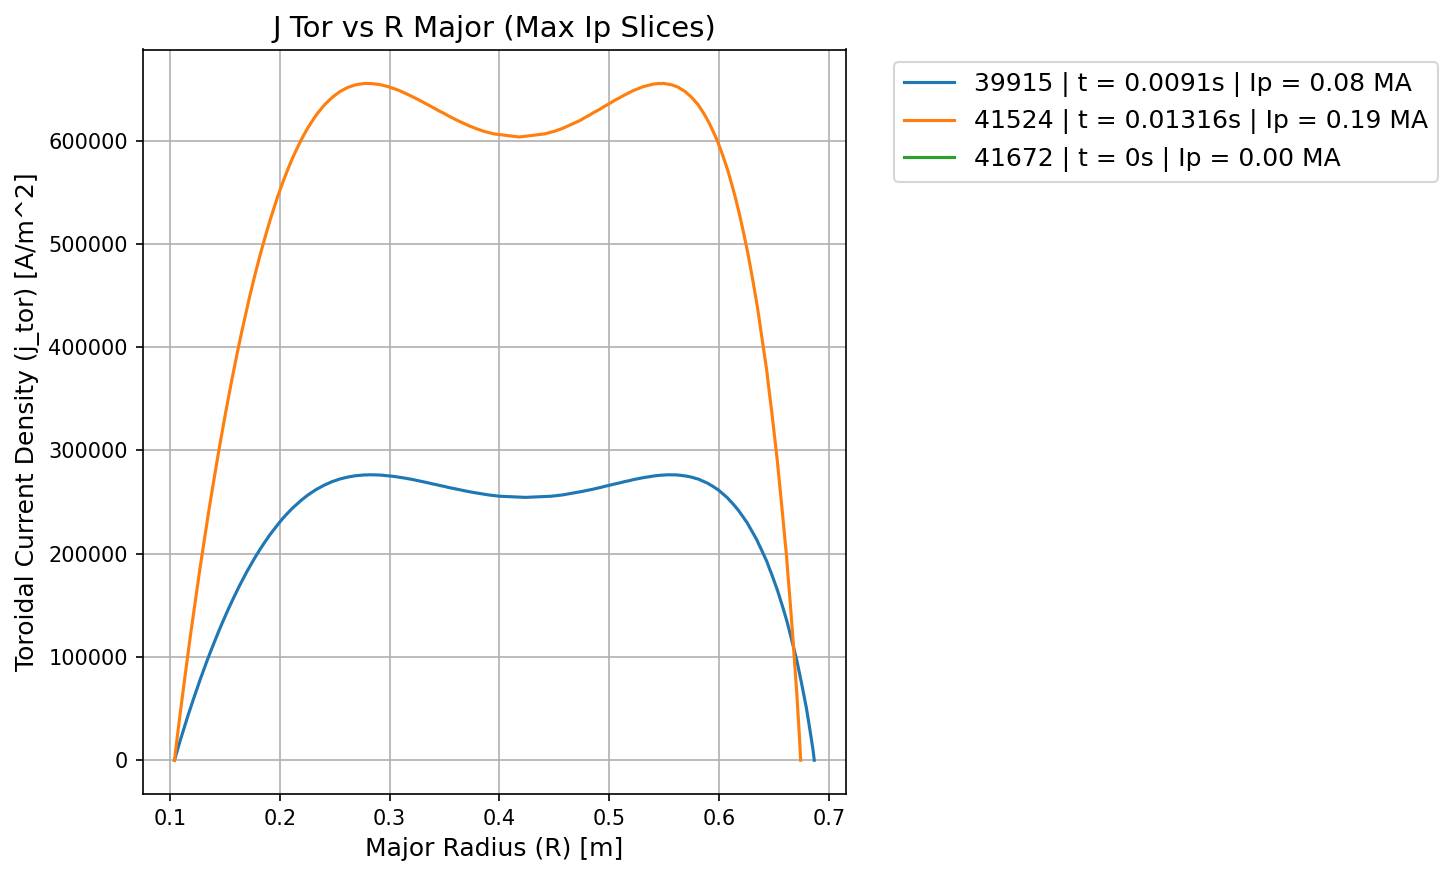

In [11]:
vaft.plot.equilibrium_r_major_j_tor(odc)

vacuum field map

coil map

filament map


### Plotting 2D Profiles

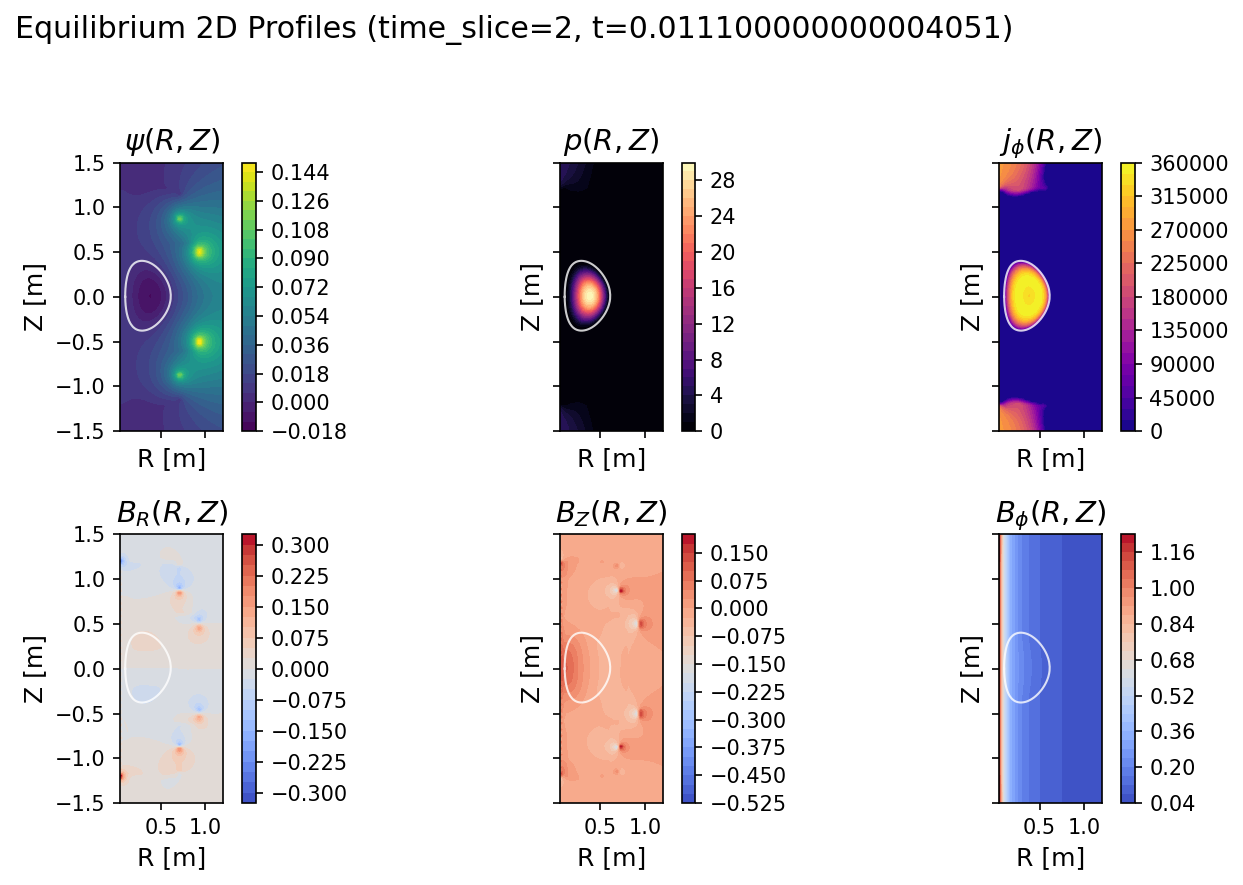

(<Figure size 1500x900 with 12 Axes>,
 array([[<Axes: title={'center': '$\\psi(R,Z)$'}, xlabel='R [m]', ylabel='Z [m]'>,
         <Axes: title={'center': '$p(R,Z)$'}, xlabel='R [m]', ylabel='Z [m]'>,
         <Axes: title={'center': '$j_{\\phi}(R,Z)$'}, xlabel='R [m]', ylabel='Z [m]'>],
        [<Axes: title={'center': '$B_R(R,Z)$'}, xlabel='R [m]', ylabel='Z [m]'>,
         <Axes: title={'center': '$B_Z(R,Z)$'}, xlabel='R [m]', ylabel='Z [m]'>,
         <Axes: title={'center': '$B_{\\phi}(R,Z)$'}, xlabel='R [m]', ylabel='Z [m]'>]],
       dtype=object))

In [16]:
vaft.plot.equilibrium_2d_profiles(ods, time_slice = 2)

### Plotting Scatter

### Plotting Animation Signals (Camera)

In [ ]:
# Planned